In [ ]:
#import the necessary packages
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
import mne
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

## Read some raw data

In [2]:
#EDF file
original_data_folder = Path('/Volumes/Macintosh HD - Data/Master Thesis/chb-mit-scalp-eeg-database-1.0.0')
Patient = ['chb04','chb06','chb08','chb15','chb17','chb19']
raw_file = os.path.join(original_data_folder,Patient[0],'{}_{}.edf'.format(Patient[0],'01'))

#Read in raw data
raw = mne.io.read_raw_edf(raw_file,preload=True)

#Get a list of all channels:
channels = raw.ch_names

raw_data = raw.get_data(return_times=True)

Extracting EDF parameters from /Volumes/Macintosh HD - Data/Master Thesis/chb-mit-scalp-eeg-database-1.0.0/chb04/chb04_01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3685887  =      0.000 ... 14397.996 secs...


## FFT

Effective window size : 1.000 (s)
Need more than one channel to make topography for eeg. Disabling interactivity.


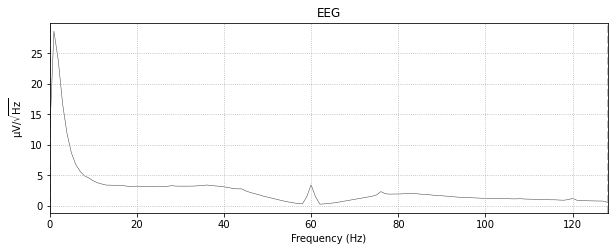

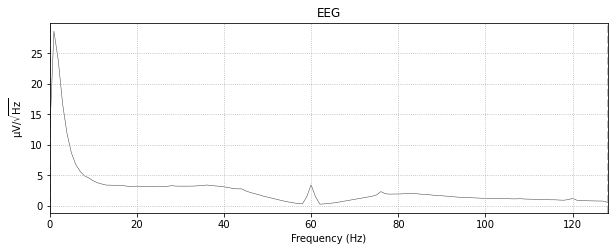

In [3]:
raw.plot_psd(picks=channels[0],n_overlap=128,n_fft=256,dB=False)

Effective window size : 1.000 (s)


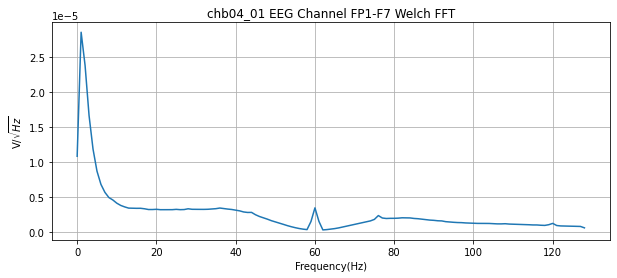

In [4]:
psd,freqs = mne.time_frequency.psd_array_welch(raw_data[0][0],sfreq=raw.info['sfreq'], n_fft=256,n_overlap=128)
plt.figure(figsize=(10, 4))
plt.plot(freqs,np.sqrt(psd))
plt.xlabel('Frequency(Hz)')
plt.ylabel(r'V/$\sqrt{Hz}$')
plt.title('{}_{} EEG Channel {} Welch FFT'.format(Patient[0],'01',channels[0]))
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.grid(True)

Effective window size : 1.000 (s)


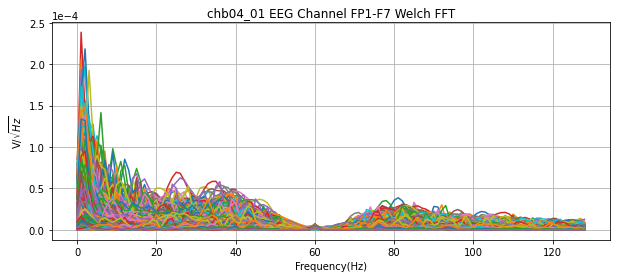

In [5]:
psd,freqs = mne.time_frequency.psd_array_welch(raw_data[0][0],sfreq=raw.info['sfreq'], n_fft=256,n_overlap=128,average=None)
plt.figure(figsize=(10, 4))
plt.plot(freqs,np.sqrt(psd))
plt.xlabel('Frequency(Hz)')
plt.ylabel(r'V/$\sqrt{Hz}$')
plt.title('{}_{} EEG Channel {} Welch FFT'.format(Patient[0],'01',channels[0]))
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.grid(True)

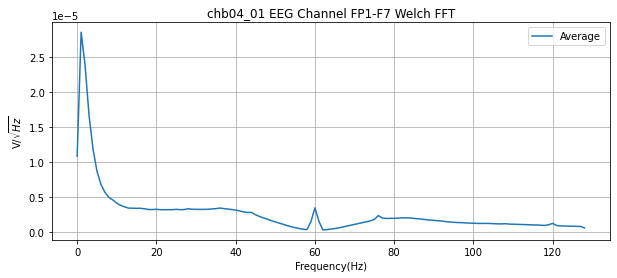

In [6]:
df = pd.DataFrame(psd,index=freqs)
df_mean = np.sqrt(df.mean(axis=1))

plt.figure(figsize=(10, 4))
df_mean.plot(label='Average')
plt.legend()
plt.xlabel('Frequency(Hz)')
plt.ylabel(r'V/$\sqrt{Hz}$')
plt.title('{}_{} EEG Channel {} Welch FFT'.format(Patient[0],'01',channels[0]))
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.grid(True)

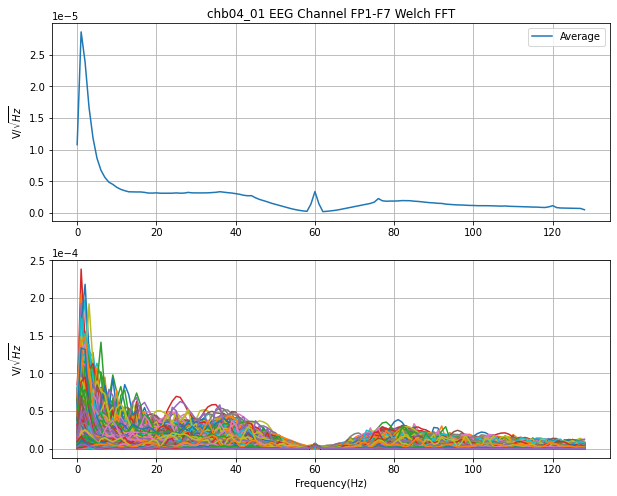

In [8]:
plt.figure(figsize=(10, 8))
plt.subplot(211)
df_mean.plot(label='Average')
plt.legend()
plt.ylabel(r'V/$\sqrt{Hz}$')
plt.title('{}_{} EEG Channel {} Welch FFT'.format(Patient[0],'01',channels[0]))
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.grid(True)
plt.subplot(212)
plt.plot(freqs,np.sqrt(psd))
plt.xlabel('Frequency(Hz)')
plt.ylabel(r'V/$\sqrt{Hz}$')
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.grid(True)
plt.savefig('ch04_01/{}_{} EEG Channel {} Welch FFT.png'.format(Patient[0],'01',channels[0]))

In [ ]:
#for i in range(len(raw_data[0])):
#    psd,freqs = mne.time_frequency.psd_array_welch(raw_data[0][i],sfreq=raw.info['sfreq'],
#                                                   n_fft=256,n_overlap=128,average=None)
#    df = pd.DataFrame(psd,index=freqs)
#    df_mean = np.sqrt(df.mean(axis=1))
#    plt.figure(figsize=(10, 8))
#    plt.subplot(211)
#    df_mean.plot(label='Average')
#    plt.legend()
#    plt.ylabel(r'V/$\sqrt{Hz}$')    
#    plt.title('{}_{} EEG Channel {} Welch FFT'.format(Patient[0],'01',channels[i]))
#    plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
#    plt.grid(True)
#    plt.subplot(212)
#    plt.plot(freqs,np.sqrt(psd))
#    plt.xlabel('Frequency(Hz)')
#    plt.ylabel(r'V/$\sqrt{Hz}$')
#    plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
#    plt.grid(True)
#    plt.savefig('ch04_01/{}_{} EEG Channel {} Welch FFT.png'.format(Patient[0],'01',channels[i]))

In [3]:
psd,freqs = mne.time_frequency.psd_array_welch(raw_data[0][0],sfreq=raw.info['sfreq'], n_fft=256,n_overlap=128,average=None)
df = pd.DataFrame(psd,index=freqs)
df_mean = np.sqrt(df.mean(axis=1))

Effective window size : 1.000 (s)


In [6]:
df.T

,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,119.0,120.0,121.0,122.0,123.0,124.0,125.0,126.0,127.0,128.0
0,4.823607e-12,1.426511e-10,5.790261e-12,1.750845e-12,4.139900e-13,6.135270e-13,7.232256e-13,2.677114e-12,1.399309e-11,3.505460e-12,...,5.115060e-13,5.290759e-13,2.611381e-14,5.118549e-13,3.583043e-13,1.117740e-13,2.647924e-14,1.043882e-13,1.352309e-14,4.127510e-15
1,1.135233e-11,6.044525e-11,3.826940e-11,2.595358e-11,3.317739e-12,1.172480e-12,1.133620e-11,6.594582e-12,5.324731e-12,2.562676e-12,...,4.011603e-13,5.045683e-13,1.001341e-13,1.206588e-13,2.560330e-14,4.713511e-15,3.476487e-14,1.600020e-13,4.680900e-14,1.388448e-18
2,7.062650e-12,2.555125e-11,4.559897e-11,1.198820e-10,8.194249e-11,2.378532e-11,2.823435e-12,6.524664e-12,4.479701e-12,6.198680e-12,...,7.337290e-14,2.487879e-13,1.901864e-14,1.170597e-14,1.141761e-14,5.560291e-15,2.698737e-14,5.573398e-14,8.752290e-14,3.020985e-14
3,2.331897e-11,4.814439e-11,2.311955e-10,4.241959e-10,2.726952e-10,1.651569e-10,1.219581e-10,1.296167e-10,9.019158e-11,4.921058e-11,...,3.235990e-14,3.308836e-13,7.938151e-14,2.832398e-15,6.640509e-15,6.460363e-15,6.076972e-14,6.148847e-14,2.534567e-14,4.016290e-15
4,3.526451e-11,1.942117e-10,2.835901e-10,6.443764e-11,4.924379e-11,2.506096e-11,2.273034e-11,6.998987e-12,1.230436e-11,1.142992e-11,...,4.092733e-13,3.904916e-13,8.694349e-15,4.429908e-14,8.116316e-14,2.669604e-14,8.151025e-14,2.093979e-14,1.117010e-14,5.854652e-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28790,1.800168e-11,1.156476e-10,7.463137e-11,1.286324e-11,1.237290e-11,3.362306e-12,2.540820e-12,1.803719e-12,3.474948e-12,1.534269e-12,...,6.906739e-13,2.832250e-14,3.340969e-14,2.753942e-13,4.424184e-13,1.000121e-12,7.569474e-13,7.845690e-15,2.484217e-13,1.297807e-14
28791,2.030447e-12,3.196449e-11,1.736168e-11,1.216819e-11,1.726089e-11,3.572124e-11,3.723222e-11,3.259705e-11,4.580871e-11,2.560571e-11,...,5.141277e-11,5.610835e-11,3.812836e-11,1.964708e-11,1.225045e-11,1.307302e-11,8.277206e-12,5.402618e-12,6.695312e-12,4.719240e-12
28792,5.958488e-13,1.857559e-11,1.315092e-11,1.427682e-11,8.976504e-12,3.361756e-12,1.200299e-12,7.179368e-14,2.894505e-12,2.803070e-12,...,2.598098e-12,1.427758e-13,1.156202e-12,2.605240e-13,3.026415e-15,1.265832e-13,2.036050e-13,1.993710e-14,5.479500e-13,6.229789e-13
28793,1.551709e-12,2.554314e-12,7.993777e-12,1.082137e-11,4.609222e-12,7.158637e-13,3.539535e-13,8.988218e-13,9.403232e-13,1.942981e-12,...,9.394567e-14,4.172213e-13,5.577516e-14,3.980359e-15,7.202963e-15,3.183550e-14,3.292104e-14,1.946877e-14,1.712431e-14,1.021265e-14
